<a href="https://colab.research.google.com/github/chandradutta/CS23M021_A1/blob/master/DeepLearning_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing wandb
!pip install wandb
import wandb
from wandb.keras import WandbCallback
import socket
socket.setdefaulttimeout(30)
wandb.login()
wandb.init(project='DL_Assignment_1')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.0 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: chandraduttamamidi (cs23m021). Use `wandb login --relogin` to force relogin


4422102/4422102 [==============================] - 0s 0us/step


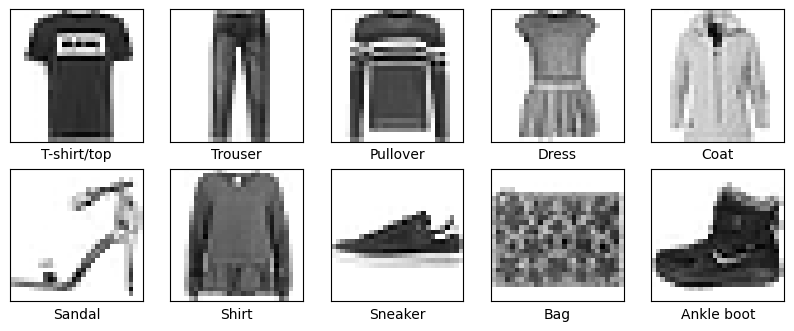

In [2]:
# import wandb
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# wandb.init(project="fashion-mnist-sample-images")

# Load the Fashion-MNIST dataset
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()
# print (len(train_images[0]))


# Defining class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(len(class_names)):
    idx = next(idx for idx, label in enumerate(y_train) if label == i)
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[idx], cmap=plt.cm.binary)
    plt.xlabel(class_names[i])
    # wandb.log({f"example_{class_names[i]}": [wandb.Image(x_train[idx], caption=class_names[i])]})

# wandb.finish()

In [3]:
import numpy as np
# def sigmoid(z):
#     clipped_z=np.clip(z,-500, 500)
#     # return 1 / (1 + np.exp(-clipped_z))
def softmax(z):
    # z=np.clip(z,-500,500)
    eps = 1e-6
    return (np.exp(z-max(z)) / (sum(np.exp(z-max(z))) + eps))
def sigmoid(z):
    clipped_z=np.clip(z,-500, 500)
    return 1 / (1 + np.exp(-clipped_z))
def tanh(z):
  clipped_z = np.clip(z, -50, 50)
  return np.tanh(clipped_z)
def relu(Z):
  A = np.maximum(0, Z)
  return A
#derivatives
def tanh_derivative(z):
  return 1-np.tanh(z)**2
def relu_derivative(z):
  return np.where(z>0,1,0)
def sigmoid_derivative(z):
  return sigmoid(z) * (1 - sigmoid(z))


#weights initialization

def weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  ws.append(np.random.randn(n,784))
  bs.append(np.random.randn(n,1))
  for i in range(1,num_of_layers):
    ws.append(np.random.randn(n,n))
    bs.append(np.random.randn(n,1))
  ws.append(np.random.randn(10,n))
  bs.append(np.random.randn(10,1))
  return ws,bs

def xavier_weights(num_of_layers,n):
  ws=[]
  ns=[]
  bs=[]
  ws.append(np.random.randn(n,784))
  bs.append(np.zeros((n,1)))
  for i in range(1,num_of_layers):
    ws.append(np.random.randn(n,n))
    bs.append(np.zeros((n,1)))
  ws.append(np.random.randn(10,n))
  bs.append(np.zeros((10,1)))
  return ws,bs






#forward

def calculate_pre_activation(weights, input_data, biases):
    return np.matmul(weights, input_data) + biases

def apply_activation(pre_activation, activation_function):
    if activation_function == 'sigmoid':
        return sigmoid(pre_activation)
    elif activation_function == 'tanh':
        return tanh(pre_activation)
    else :
        return relu(pre_activation)
def forward(x_train, ws, bs, activationfun, hidLay):
    x = x_train.reshape(784, 1) / 255.0
    pre_act = [0 for i in range(hidLay + 1)]
    activ = [0 for i in range(hidLay + 1)]

    for i in range(hidLay):
        if i == 0:
            pre_act[i] = calculate_pre_activation(ws[i], x, bs[i])
        else:
            pre_act[i] = calculate_pre_activation(ws[i], activ[i - 1], bs[i])

        activ[i] = apply_activation(pre_act[i], activationfun)
        # print(pre_act[i].shape)
        # print(activ[i].shape)
    pre_act[hidLay] = calculate_pre_activation(ws[hidLay], activ[hidLay - 1], bs[hidLay])
    activ[hidLay] = softmax(pre_act[hidLay])
    # print(pre_act[-1].shape)
    # print(activ[-1].shape)
    # prin(1)
    return activ, pre_act

#calculate back propagation

def calculate_gradients(d_a, activation_prev, theta, activationfun):
    d_w = np.matmul(d_a, activation_prev.T)
    d_b = np.copy(d_a)
    return d_w, d_b

def update_d_a(d_a, pre_activation_prev, theta, activationfun):
    d_h_prev = np.matmul(theta.T, d_a)

    if activationfun == 'sigmoid':
        d_a_new = np.multiply(d_h_prev, sigmoid_derivative(pre_activation_prev))
    elif activationfun == 'tanh':
        d_a_new = np.multiply(d_h_prev, tanh_derivative(pre_activation_prev))
    else:
        d_a_new = np.multiply(d_h_prev, relu_derivative(pre_activation_prev))

    return d_a_new



def compute(yt):
  e_l = np.zeros((10, 1))
  e_l[yt] = 1
  return e_l
def backwardPropagation(theta_w, activations, pre_activations, yt, hidLay, x, activationfun, l_fun):
    d_w = [0 for _ in range(hidLay + 1)]
    d_b = [0 for _ in range(hidLay + 1)]
    o_hot=compute(yt)
    if l_fun == 'entropy':
        d_a = -(o_hot - activations[hidLay])
    else:
        d_a = (activations[hidLay] - o_hot) * activations[hidLay] * (1 - activations[hidLay])

    layers = len(theta_w) - 1

    # while layers > 0:
    for layers in range(layers,0,-1):
        d_w[layers], d_b[layers] = calculate_gradients(d_a, activations[layers - 1], theta_w[layers], activationfun)
        d_a = update_d_a(d_a, pre_activations[layers - 1], theta_w[layers], activationfun)
        # layers -= 1

    d_w[0] = np.matmul(d_a, x.T)
    d_b[0] = np.copy(d_a)

    return d_w, d_b




def accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun):
  acc=0
  val=0
  for i in range(54000):
    act,p_act=forward(x_train[i],theta_w,theta_b,activationfun,hidLay)
    # print(np.argmax(act[-1]),end=",")
    if(np.argmax(act[-1])==y_train[i]):
     acc=acc+1
    temp=act[-1]
    if(l_fun=="entropy"):
     val=val-np.log(temp[y_train[i]]+(1e-5))
    elif (l_fun=="mean_squared_error"):
     val+=np.sum((y_train[i] -act[-1]) ** 2)
  return (acc/540),val
  # return (acc/540)

def validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun):
  accuracy=0
  val=0
  start_index = int(len(x_train) * 0.1)

  for i in range(start_index, len(x_train)):
    act,p_act=forward(x_train[i],theta_w,theta_b,activationfun,hidLay)
    if(np.argmax(act[-1])==y_train[i]):
      accuracy+=1
    temp=act[-1]
    val=val-np.log(temp[y_train[i]]+(1e-5))
  return (accuracy/(int(len(x_train))))*100,val





def do_sgd(theta_w,theta_b,x_train,y_train, learning_rate, max_iterations,activationfun,hidLay,l_fun):
  for ii in range(max_iterations):
    dw = [0 for iii in range(0,hidLay+1)]
    db = [0 for iii in range(0,hidLay+1)]

    for xt,yt in zip(x_train,y_train):
      # print(xt.shape)
      activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
      # activations.reverse()
      # print(activations[-1].shape)
      x = xt.reshape(784,1) / 255.0
      gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
      for i in range(len(theta_w)):
        theta_w[i] = theta_w[i] - learning_rate * gradients_weights[i]
        theta_b[i] = theta_b[i] - learning_rate * gradients_biases[i]
    acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
    v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
    print(acc,loss)
    print(v_acc,v_loss)
    wandb.log({"Train_Accuracy" : acc})
    wandb.log({"Train_Loss" : loss})
    wandb.log({"Validation_acc" : v_acc})
    wandb.log({"Validation_loss" : v_loss})
    wandb.log({"epoch" : max_iterations})




def do_mgd(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
    prev_db = [np.zeros_like(w) for w in theta_b]  # Initialize previous gradients for biases

    for epoch in range(max_epochs):
        t=1
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(w) for w in theta_b]
        # print(d_w[0].shape,theta_w[0].shape)
        for xt,yt in zip(x_train,y_train):
            # print(xt.shape)
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # activations.reverse()
            # print(activations[-1].shape)
            x = xt.reshape(784,1) / 255.0
            gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            # Compute squared gradients and update parameters
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if((t%batch_size)==0):
              for i in range(len(theta_w)):
                prev_dw[i] = beta*prev_dw[i] + d_w[i]
                prev_db[i] = beta*prev_db[i] + d_b[i]

                theta_b[i] = theta_b[i] - eta*prev_db[i]
                theta_w[i] = theta_w[i] - eta*prev_dw[i]-weight_decay*theta_w[i]

              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]

            t=t+1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})





def do_nag(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    prev_dw = [np.zeros_like(w) for w in theta_w]  # Initialize previous gradients for weights
    prev_db = [np.zeros_like(b) for b in theta_b]  # Initialize previous gradients for biases

    for epoch in range(max_epochs):
        t=1
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        d_wx = [np.zeros_like(w) for w in theta_w]
        d_bx = [np.zeros_like(b) for b in theta_b]
        for xt,yt in zip(x_train,y_train):

            lookahead_weights = [w - beta * prev_dw[i] for i, w in enumerate(theta_w)]
            lookahead_biases = [b - beta * prev_db[i] for i, b in enumerate(theta_b)]
            activations, pre_activations= forward(xt,lookahead_weights,lookahead_biases,activationfun,hidLay)
            # activations.reverse()
            # print(activations[-1].shape)
            x = xt.reshape(784,1) / 255.0
            gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)

            for i in range(len(theta_w)):
              d_w[i] += gradients_weights[i]
              d_b[i] += gradients_biases[i]
            if(t)%batch_size==0:
              for i in range(len(theta_w)):
                prev_dw[i] = beta*prev_dw[i] + d_w[i]
                prev_db[i] = beta*prev_db[i] + d_b[i]

                theta_b[i] = theta_b[i] - eta*prev_db[i]
                theta_w[i] = theta_w[i] - eta*prev_dw[i]
                # d_wx[i] = beta * prev_dw[i] + eta * d_w[i]  # Compute momentum-based gradient for weights
                # d_bx[i] = beta * prev_db[i] + eta * d_b[i]  # Compute momentum-based gradient for biases
                #   # Update weights and biases
                # theta_w[i] -= (d_wx[i])-weight_decay*theta_w[i]
                # theta_b[i] -= d_bx[i]

                # # Update previous gradients for the next iteration
                # prev_dw[i] = d_wx[i]
                # prev_db[i] = d_bx[i]
              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]
            t+=1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})





def do_rmsprop(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay):
    # Initialization
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize squared gradients for weights
    v_db = [np.zeros_like(b) for b in theta_b]  # Initialize squared gradients for biases
    eps = 1e-4  # Small constant to prevent division by zero

    for epoch in range(max_epochs):
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        t=1
        for xt,yt in zip(x_train,y_train):
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # Backward propagation
            x = xt.flatten().reshape(784,1)

            gradients_weights, gradients_biases =backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            # Compute squared gradients and update parameters

            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]

                # v_dw[i] = beta * v_dw[i] + (1 - beta) * gradients_weights[i] ** 2  # RMSprop update for weights
                # v_db[i] = beta * v_db[i] + (1 - beta) * gradients_biases[i] ** 2  # RMSprop update for biases


            if(t%batch_size==0):
              for k in range(len(theta_w)):
                v_dw[k] = (1 - beta) * (d_w[k] ** 2) + beta * v_dw[k]  # RMSprop update for weights
                v_db[k] = (1 - beta) * (d_b[k] ** 2) + beta * v_db[k]
                # Update weights and biases
                theta_w[k] -= (learning_rate*d_w[k])/ (np.sqrt(v_dw[k]) + eps)-weight_decay*theta_w[k]
                theta_b[k] -= (learning_rate*d_b[k])/ (np.sqrt(v_db[k])+ eps)
            t+=1

        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})





def do_adam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun):
    # Initialization
    m_dw = [np.zeros_like(w) for w in theta_w]  # Initialize first moment for weights
    m_db = [np.zeros_like(w) for w in theta_b]  # Initialize first moment for biases
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize second moment for weights
    v_db = [np.zeros_like(w) for w in theta_b]  # Initialize second moment for biases
    eps = 1e-8  # Small constant to prevent division by zero
    # t = 0  # Time step initialization

    for epoch in range(max_epochs):
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        t=1
        for xt,yt in zip(x_train,y_train):
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # Backward propagation
            x = xt.flatten().reshape(784,1)/255.0

            gradients_weights, gradients_biases =backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if(t)%batch_size==0:

              # Update biased first moment estimates
              for i in range(len(theta_w)):
                  # print(len(theta_w))
                  m_dw[i] =  (1 - beta1) * d_w[i] +beta1 * m_dw[i] # Update first moment for weights
                  m_db[i] =  (1 - beta1) * d_b[i]+beta1 * m_db[i]   # Update first moment for biases
                  v_dw[i] =  (1 - beta2) * (d_w[i] ** 2)  +beta2 * v_dw[i]  # Update second moment for weights
                  v_db[i] =  (1 - beta2) * (d_b[i] ** 2) +beta2 * v_db[i]  # Update second moment for biases

                  # Correct bias in first moment
                  m_dw_corrected = m_dw[i] / (1 - beta1 ** epoch+1)  # Correct first moment for weights
                  m_db_corrected = m_db[i] / (1 - beta1 ** epoch+1)  # Correct first moment for biases

                  v_dw_corrected = v_dw[i] / (1 - beta2 ** epoch+1) # Correct second moment for weights
                  v_db_corrected = v_db[i] / (1 - beta2 ** epoch+1)  # Correct second moment for biases

                  # Update parameters
                  theta_w[i] -= (eta * m_dw_corrected) / (np.sqrt(v_dw_corrected) + eps)-(weight_decay*theta_w[i]) # Update weights
                  theta_b[i] -= (eta * m_db_corrected)/ (np.sqrt(v_db_corrected) + eps)  # Update biases
              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]
            t+=1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})






def do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun):
    # Initialization
    m_dw = [np.zeros_like(w) for w in theta_w]  # Initialize first moment for weights
    m_db = [np.zeros_like(w) for w in theta_b]  # Initialize first moment for biases
    v_dw = [np.zeros_like(w) for w in theta_w]  # Initialize second moment for weights
    v_db = [np.zeros_like(w) for w in theta_b]  # Initialize second moment for biases
    eps = 1e-8  # Small constant to prevent division by zero
    # t = 0  # Time step initialization

    for epoch in range(max_epochs):
        d_w = [np.zeros_like(w) for w in theta_w]
        d_b = [np.zeros_like(b) for b in theta_b]
        t=1
        for xt,yt in zip(x_train,y_train):
            activations, pre_activations= forward(xt,theta_w,theta_b,activationfun,hidLay)
            # Backward propagation
            x = xt.flatten().reshape(784,1)/255.0

            gradients_weights, gradients_biases =backwardPropagation(theta_w,activations,pre_activations,yt,hidLay,x,activationfun,l_fun)
            for i in range(len(theta_w)):
                d_w[i] += gradients_weights[i]
                d_b[i] += gradients_biases[i]
            if(t)%batch_size==0:

              # Update biased first moment estimates
              for i in range(len(theta_w)):
                  # print(len(theta_w))
                  m_dw[i] =  (1 - beta1) * d_w[i] +beta1 * m_dw[i] # Update first moment for weights
                  m_db[i] =  (1 - beta1) * d_b[i]+beta1 * m_db[i]   # Update first moment for biases
                  v_dw[i] =  (1 - beta2) * d_w[i] ** 2  +beta2 * v_dw[i]  # Update second moment for weights
                  v_db[i] =  (1 - beta2) * d_b[i] ** 2 +beta2 * v_db[i]  # Update second moment for biases


                  m_dw_corrected = m_dw[i] / (1 - beta1 ** epoch+1)  # Correct first moment for weights
                  m_db_corrected = m_db[i] / (1 - beta1 ** epoch+1)  # Correct first moment for biases

                  v_dw_corrected = v_dw[i] / (1 - beta2 ** epoch+1) # Correct second moment for weights
                  v_db_corrected = v_db[i] / (1 - beta2 ** epoch+1)  # Correct second moment for biases

                  # sqrt_v_dw = np.sqrt(v_dw_corrected + eps)
                  # sqrt_v_db = np.sqrt(v_db_corrected + eps)
                  # beta1_power = 1 - beta1**(epoch + 1)

                  # # Update weights
                  # update_w = eta / sqrt_v_dw
                  # momentum_w = beta1 * m_dw_corrected + (1 - beta1) * d_w[i] / beta1_power
                  # weight_decay_w = weight_decay * theta_w[i]
                  # theta_w[i] = theta_w[i] - update_w * momentum_w - weight_decay_w

                  # # Update biases
                  # update_b = eta / sqrt_v_db
                  # momentum_b = beta1 * m_db_corrected + (1 - beta1) * d_b[i] / beta1_power
                  # theta_b[i] = theta_b[i] - update_b * momentum_b
                  theta_w[i] = theta_w[i] - (eta / (np.sqrt(v_dw_corrected+eps)))*(beta1 * m_dw_corrected + (1-beta1)*d_w[i]/(1-beta1**(epoch+1))) - (weight_decay * theta_w[i])
                  theta_b[i] = theta_b[i] - (eta / (np.sqrt(v_db_corrected+eps)))*(beta1 * m_db_corrected + (1-beta1)*d_b[i]/(1-beta1**(epoch+1)))
              d_w = [np.zeros_like(w) for w in theta_w]
              d_b = [np.zeros_like(w) for w in theta_b]
            t+=1
        acc,loss=accuracy(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        v_acc,v_loss=validation(theta_w,theta_b,x_train,y_train,activationfun,hidLay,l_fun)
        print(acc,loss)
        print(v_acc,v_loss)
        wandb.log({"Train_Accuracy" : acc})
        wandb.log({"Train_Loss" : loss})
        wandb.log({"Validation_acc" : v_acc})
        wandb.log({"Validation_loss" : v_loss})
        wandb.log({"epoch" : epoch})




In [ ]:
# hidLay=4
# theta_w,theta_b=weights(hidLay,32)
# max_epochs=5
# eta=0.001
# beta1=0.9
# beta2=0.999
# weight_decay=0
# activationfun='sigmoid'
# batch_size=16
# l_fun='entropy'
# # activations, pre_activations=forward(x_train[1], theta_w, theta_b, 'sigmoid', hidLay)
# # x = x_train[1].reshape(784,1) / 255.0
# # gradients_weights, gradients_biases = backwardPropagation(theta_w,activations,pre_activations,y_train[1],hidLay,x,'sigmoid','entropy')
# # # do_sgd(theta_w,theta_b,x_train,y_train, 0.001, 5,'sigmoid',hidLay,'entropy')
# # do_mgd(5, x_train, y_train, theta_w, theta_b, 0.001, 0.5,0.0005,'sigmoid',64,'entropy',hidLay)
# # do_adam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
# do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, eta, beta1, beta2,weight_decay,activationfun,batch_size,hidLay,l_fun)

In [ ]:
def mainfunction(optimization_algorithm,max_epochs, x_train, y_train, theta_w, theta_b,learning_rate, beta,beta1,weight_decay,activationfun,batch_size,l_fun,hidLay):
  if optimization_algorithm == 'mgd':
    do_mgd(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  elif optimization_algorithm == 'ngd':
    do_nag(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  elif optimization_algorithm == 'rmsprop':
      do_rmsprop(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta,weight_decay,activationfun,batch_size,l_fun,hidLay)
  elif optimization_algorithm == 'adam':
    do_adam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
  elif optimization_algorithm == 'nadam':
    do_nadam(max_epochs, x_train, y_train, theta_w, theta_b, learning_rate, beta, beta1,weight_decay,activationfun,batch_size,hidLay,l_fun)
  else:
    do_sgd(theta_w,theta_b,x_train,y_train, learning_rate, max_epochs,activationfun,hidLay,l_fun)

def main():
  wandb.init(project="DL_Assignment_1", entity="cs23m021")
  p=wandb.config
  with wandb.init(project='DL_Assignment_1') as run:
    theta_w=[]
    theta_b=[]
    if (p.weightInit=="random"):
      theta_w,theta_b=weights(p.hidLay,p.neurons)
    if (p.weightInit=="xavier"):
      theta_w,theta_b=xavier_weights(p.hidLay,p.neurons)
    mainfunction(p.optimization_algorithm,p.max_epochs,x_train, y_train,theta_w, theta_b,p.learning_rate,0.9,0.99,p.weight_decay,p.activationfun,p.batch_size,p.l_fun,p.hidLay)

parameters_from_sweep = {
    'method' : 'bayes',
    'name'   : 'Accuracy',
    'metric' : {
        'goal' : 'maximize',
        'name' : 'Validation_acc',
    },
    'parameters' : {
        'neurons':{'values':[32,64,128]},
        'optimization_algorithm':{'values':['adam','nadam']},
        'max_epochs' : {'values' : [5,10]},
        'hidLay'       : {'values' : [3,4,5]},
        'weight_decay' : {'values' : [0] } ,
        'learning_rate' : {'values' : [0.001,0.0001]},
        'weightInit' : {'values': ['random','xavier']},
        'batch_size' : {'values': [16,32,64]},
        'l_fun':{'values':['entropy']},
        'activationfun' : {'values' : ['sigmoid','tanh','relu']}
    }
}

sweepId = wandb.sweep(parameters_from_sweep,project = 'DL_Assignment_1')

# wandb.agent(sweepId,function=main,count=30)
wandb.agent("slbu8ay5",function=main,count=30)

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: f6h4xoe5
Sweep URL: https://wandb.ai/cs23m021/DL_Assignment_1/sweeps/f6h4xoe5


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: zamlez3m with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 32
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


74.90555555555555 [37304.9253182]
67.44666666666667 [37200.32000161]
78.60740740740741 [31977.10335565]
70.775 [31879.57520953]
80.4074074074074 [29203.27409585]
72.395 [29128.70398672]
81.51666666666667 [27374.51204941]
73.43499999999999 [27304.14314319]
82.3962962962963 [26060.99684009]
74.18666666666667 [25998.49275935]
83.01851851851852 [25082.78578752]
74.75 [25028.16494371]
83.43148148148148 [24334.59209205]
75.12333333333333 [24279.12122683]
83.83148148148148 [23725.10118559]
75.465 [23668.43009307]
84.26481481481481 [23206.37423415]
75.87333333333333 [23148.87411801]
84.5925925925926 [22753.33144771]
76.16833333333334 [22695.25266287]


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▁▁▁
Validation_acc,▁▄▅▆▆▇▇▇██
Validation_loss,█▅▄▃▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,84.59259
Train_Loss,22753.33145
Validation_acc,76.16833
Validation_loss,22695.25266
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0tg1kayz with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


80.86666666666666 [28283.67792212]
72.875 [28048.88490033]
83.09814814814816 [24766.3122308]
74.815 [24591.2702025]
84.11296296296297 [23081.5628811]
75.81 [22897.7568412]
84.80740740740741 [22054.03235028]
76.47500000000001 [21859.00056617]
85.4 [21235.24850147]
77.02 [21037.68167088]
85.85555555555555 [20515.00227216]
77.415 [20318.73519071]
86.24444444444444 [19945.97211166]
77.79833333333333 [19750.26614641]
86.52962962962962 [19478.83991378]
78.06666666666666 [19287.0980448]
86.86111111111111 [19077.22504799]
78.33 [18888.7621314]
87.11296296296297 [18715.96799613]
78.565 [18528.88360892]


Train_Accuracy,▁▄▅▅▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_acc,▁▃▅▅▆▇▇▇██
Validation_loss,█▅▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,87.11296
Train_Loss,18715.968
Validation_acc,78.565
Validation_loss,18528.88361
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: swew8dbf with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 128
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


79.41296296296296 [30798.25300127]
71.71166666666666 [30351.83517592]
82.75185185185185 [26064.67557511]
74.655 [25665.27191591]
84.13888888888889 [23725.8767923]
75.93666666666667 [23372.29305256]
84.85925925925926 [22378.9111448]
76.55833333333332 [22072.52142876]
85.47592592592592 [21296.12775497]
77.08833333333334 [20988.12738352]
85.98518518518519 [20350.18898251]
77.565 [20054.76531175]
86.5111111111111 [19566.77366917]
78.015 [19273.00778012]
86.97962962962963 [18846.52361893]
78.46666666666667 [18547.19606596]
87.48518518518519 [18205.58552707]
78.91166666666666 [17903.94181052]
87.9 [17692.84050874]
79.28333333333333 [17394.22111968]


Train_Accuracy,▁▄▅▅▆▆▇▇██
Train_Loss,█▅▄▄▃▂▂▂▁▁
Validation_acc,▁▄▅▅▆▆▇▇██
Validation_loss,█▅▄▄▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,87.9
Train_Loss,17692.84051
Validation_acc,79.28333
Validation_loss,17394.22112
epoch,9


wandb: Agent Starting Run: pglb4aw4 with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 16
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


81.52222222222223 [27762.11671066]
73.45333333333333 [27510.33873124]
84.02037037037037 [24118.45969783]
75.73166666666667 [23807.6782135]
85.28888888888889 [22005.99415994]
76.87833333333333 [21753.06779552]
86.09814814814816 [20770.04938193]
77.595 [20566.14058079]
86.79074074074074 [19601.29539729]
78.245 [19328.85245356]
87.0962962962963 [19129.21971156]
78.41833333333334 [18948.27933582]
87.74074074074075 [18139.10840807]
79.035 [17932.9243543]
88.06666666666666 [17490.89937551]
79.33166666666666 [17301.82822308]
88.42037037037036 [17086.36538451]
79.66833333333334 [16892.47659234]
88.5537037037037 [16651.53563479]
79.82333333333334 [16459.8801478]


Train_Accuracy,▁▃▅▆▆▇▇███
Train_Loss,█▆▄▄▃▃▂▂▁▁
Validation_acc,▁▄▅▆▆▆▇▇██
Validation_loss,█▆▄▄▃▃▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,88.5537
Train_Loss,16651.53563
Validation_acc,79.82333
Validation_loss,16459.88015
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: f9mx2p85 with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


80.16111111111111 [29603.29382138]
72.22666666666666 [29481.40534435]
82.88888888888889 [25408.68599137]
74.6 [25302.60722648]
84.21666666666667 [23358.46004265]
75.85333333333332 [23255.13076058]
85.16666666666667 [22069.77073544]
76.68333333333334 [21959.56247651]
85.7462962962963 [21091.85842306]
77.24666666666667 [20979.36282593]
86.32222222222222 [20306.72034884]
77.75333333333333 [20194.94095692]
86.8 [19629.54240234]
78.18833333333333 [19519.94570666]
87.14814814814815 [19036.86069079]
78.495 [18929.40543684]
87.47592592592592 [18532.58190496]
78.805 [18426.21648961]
87.77777777777777 [18077.56414671]
79.07499999999999 [17971.99186496]


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_acc,▁▃▅▆▆▇▇▇██
Validation_loss,█▅▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,87.77778
Train_Loss,18077.56415
Validation_acc,79.075
Validation_loss,17971.99186
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: qhay11j4 with config:
wandb: 	activationfun: tanh
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


57.237037037037034 [67812.90979181]
51.55 [67391.48593518]
66.84444444444445 [48289.160203]
60.27666666666667 [48030.59888922]
71.10925925925926 [42289.18815081]
64.10333333333334 [42114.36560451]
73.1037037037037 [39061.61771486]
65.995 [38869.21118981]
74.91111111111111 [37011.48373934]
67.65333333333334 [36766.05099983]
75.28148148148148 [36579.82959891]
67.94166666666666 [36261.86842705]
77.28333333333333 [34284.69064913]
69.77 [33970.35457791]
76.85 [34113.52908152]
69.21666666666667 [33924.74727091]
77.57592592592593 [33250.90756391]
69.92 [33071.04341532]
78.62037037037037 [32484.90250028]
70.94333333333334 [32089.69449751]


Train_Accuracy,▁▄▆▆▇▇█▇██
Train_Loss,█▄▃▂▂▂▁▁▁▁
Validation_acc,▁▄▆▆▇▇█▇██
Validation_loss,█▄▃▂▂▂▁▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,78.62037
Train_Loss,32484.9025
Validation_acc,70.94333
Validation_loss,32089.6945
epoch,9


wandb: Agent Starting Run: 44e7x5ro with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 32
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


79.5962962962963 [30755.81332882]
71.73166666666667 [30584.32856093]
82.01296296296296 [26928.07377237]
73.88666666666667 [26795.19426408]
83.32592592592593 [24998.28644612]
75.03166666666667 [24891.2375445]
84.12407407407407 [23743.25926466]
75.75833333333334 [23648.27838802]
84.66481481481482 [22889.97790091]
76.265 [22791.78678356]
85.05185185185185 [22207.58398723]
76.61166666666666 [22111.3397281]
85.40185185185184 [21654.55989935]
76.93666666666667 [21559.12369173]
85.68518518518519 [21164.73908228]
77.16833333333334 [21072.44923486]
85.99444444444444 [20741.22120103]
77.455 [20651.09750295]
86.21481481481482 [20369.33688691]
77.65833333333333 [20281.99371077]


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_acc,▁▄▅▆▆▇▇▇██
Validation_loss,█▅▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,86.21481
Train_Loss,20369.33689
Validation_acc,77.65833
Validation_loss,20281.99371
epoch,9


wandb: Agent Starting Run: vpq1jsqp with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


82.45925925925926 [26238.71188097]
74.36500000000001 [25870.420166]
85.08703703703704 [22453.36904334]
76.73666666666666 [22127.1470405]
86.24814814814815 [20355.46209269]
77.83 [20003.86510801]
87.07222222222222 [19061.76387605]
78.535 [18729.74108437]
87.67592592592592 [18052.34160807]
79.11666666666667 [17700.58654164]
88.29444444444445 [17215.27072139]
79.67166666666667 [16851.85372733]
88.76666666666667 [16682.90552771]
80.11 [16312.92169161]
89.07037037037037 [16254.46013084]
80.38 [15862.24541736]
89.28148148148148 [15850.18837085]
80.56666666666666 [15470.33231293]
89.49814814814815 [15431.54659262]
80.78333333333333 [15046.45021019]


Train_Accuracy,▁▄▅▆▆▇▇███
Train_Loss,█▆▄▃▃▂▂▂▁▁
Validation_acc,▁▄▅▆▆▇▇███
Validation_loss,█▆▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,89.49815
Train_Loss,15431.54659
Validation_acc,80.78333
Validation_loss,15046.45021
epoch,9


wandb: Agent Starting Run: ioly2ugw with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 128
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


79.76296296296296 [30738.97557489]
72.065 [30282.57178295]
82.42777777777778 [26266.86320321]
74.46000000000001 [25865.91731528]
83.88703703703703 [23830.52171543]
75.79833333333333 [23453.07447504]
84.75 [22308.25350762]
76.535 [21969.28739811]
85.44814814814815 [21178.26636292]
77.14833333333333 [20852.96926855]
85.97962962962963 [20200.06734982]
77.60666666666667 [19891.65073358]
86.43888888888888 [19438.49140077]
78.00833333333334 [19148.24139818]
86.8425925925926 [18793.0636045]
78.345 [18518.47321157]
87.23518518518519 [18182.21648674]
78.68666666666667 [17925.31442171]
87.60185185185185 [17675.43420965]
79.02666666666667 [17435.44657217]


Train_Accuracy,▁▃▅▅▆▇▇▇██
Train_Loss,█▆▄▃▃▂▂▂▁▁
Validation_acc,▁▃▅▅▆▇▇▇██
Validation_loss,█▆▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,87.60185
Train_Loss,17675.43421
Validation_acc,79.02667
Validation_loss,17435.44657
epoch,9


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 495nwgdh with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 32
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


80.96111111111111 [29190.35209067]
72.94166666666668 [28989.21263444]
83.2537037037037 [25559.29138757]
75.01833333333333 [25366.37454848]
84.32777777777778 [23884.52499398]
75.96166666666667 [23707.62826717]
85.10925925925926 [22805.66481257]
76.665 [22656.57256987]
85.57592592592593 [22029.10591694]
77.05833333333332 [21892.00697137]
85.94444444444444 [21485.55336674]
77.365 [21345.41604781]
86.21111111111111 [21011.30055399]
77.615 [20873.32898805]
86.48333333333333 [20574.20517688]
77.87166666666666 [20435.47193473]
86.72962962962963 [20163.86728219]
78.09333333333333 [20027.7507627]
86.97592592592592 [19811.69679058]
78.29166666666667 [19675.38674679]


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_acc,▁▄▅▆▆▇▇▇██
Validation_loss,█▅▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,86.97593
Train_Loss,19811.69679
Validation_acc,78.29167
Validation_loss,19675.38675
epoch,9


wandb: Agent Starting Run: 3zgijh2f with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 5
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


81.62962962962963 [27718.65592747]
73.60166666666666 [27460.61874373]
83.55185185185185 [24115.4259247]
75.36666666666667 [23868.48180403]
84.85555555555555 [21954.33508258]
76.47500000000001 [21741.06773116]
85.57777777777778 [20672.22185611]
77.15833333333333 [20475.13338118]
86.24444444444444 [19778.39904747]
77.71666666666667 [19588.99579279]
86.78703703703704 [19009.87264972]
78.17833333333334 [18822.9773504]
87.2 [18432.99735985]
78.54833333333333 [18243.61008416]
87.51481481481481 [17963.76152044]
78.82666666666667 [17770.3126695]
87.80925925925926 [17554.53622253]
79.08166666666666 [17359.32256493]
88.00925925925925 [17228.63460111]
79.24833333333333 [17033.4332643]


Train_Accuracy,▁▃▅▅▆▇▇▇██
Train_Loss,█▆▄▃▃▂▂▁▁▁
Validation_acc,▁▃▅▅▆▇▇▇██
Validation_loss,█▆▄▃▃▂▂▁▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,88.00926
Train_Loss,17228.6346
Validation_acc,79.24833
Validation_loss,17033.43326
epoch,9


wandb: Agent Starting Run: kv3m2xf2 with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: adam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


78.28518518518518 [32222.14701315]
70.52166666666668 [32079.61590983]
81.33333333333333 [27561.21820745]
73.27 [27424.30458735]
82.88333333333334 [25332.12541355]
74.625 [25195.70460264]
83.78333333333333 [23946.53635702]
75.43333333333334 [23809.22455341]
84.60925925925926 [22867.64419828]
76.17166666666667 [22737.58305619]
85.24814814814815 [21969.95923972]
76.75333333333333 [21841.14598747]
85.7388888888889 [21214.51123259]
77.18333333333334 [21088.70289368]
86.11481481481482 [20601.33505518]
77.55833333333332 [20475.76421161]
86.4888888888889 [20084.42440533]
77.91 [19958.91652732]
86.79444444444445 [19631.92628044]
78.18833333333333 [19506.08728273]


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_acc,▁▄▅▅▆▇▇▇██
Validation_loss,█▅▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,86.79444
Train_Loss,19631.92628
Validation_acc,78.18833
Validation_loss,19506.08728
epoch,9


wandb: Agent Starting Run: 5n6mszj7 with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


80.73333333333333 [29101.80726278]
72.80166666666666 [28923.76572539]
83.13518518518518 [25039.0382107]
74.95166666666667 [24848.85140027]
84.28518518518518 [23229.15981446]
75.98333333333333 [23015.64862295]
85.14259259259259 [21964.05160384]
76.76666666666667 [21745.53452701]
85.84444444444445 [20968.96668887]
77.39666666666668 [20760.60978664]
86.35 [20206.39820493]
77.86999999999999 [20010.09059688]
86.78518518518518 [19604.0258469]
78.24333333333333 [19415.68224044]
87.13888888888889 [19101.10431421]
78.56666666666666 [18918.4848413]
87.41111111111111 [18661.28878026]
78.825 [18482.99845629]
87.66481481481482 [18259.92600207]
79.03999999999999 [18084.6085381]


Train_Accuracy,▁▃▅▅▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_acc,▁▃▅▅▆▇▇▇██
Validation_loss,█▅▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,87.66481
Train_Loss,18259.926
Validation_acc,79.04
Validation_loss,18084.60854
epoch,9


wandb: Agent Starting Run: yumt2cj1 with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 64
wandb: 	hidLay: 4
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 64
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: random
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


80.84074074074074 [28536.90836966]
72.81666666666666 [28362.2807894]
83.49444444444444 [24575.05603942]
75.25500000000001 [24378.77878879]
84.71111111111111 [22648.00476485]
76.375 [22465.08860643]
85.55 [21401.27254535]
77.13333333333333 [21227.0470974]
86.1 [20500.61149572]
77.66499999999999 [20332.20106726]
86.50185185185185 [19804.31520451]
78.01833333333333 [19637.30491444]
86.97407407407407 [19231.48786606]
78.415 [19067.61152788]
87.34074074074074 [18744.01546658]
78.72833333333334 [18580.57802297]
87.6037037037037 [18313.10409947]
78.94333333333333 [18151.56880267]
87.8425925925926 [17919.14296059]
79.15333333333334 [17762.35934328]


Train_Accuracy,▁▄▅▆▆▇▇▇██
Train_Loss,█▅▄▃▃▂▂▂▁▁
Validation_acc,▁▄▅▆▆▇▇███
Validation_loss,█▅▄▃▃▂▂▂▁▁
epoch,▁▂▃▃▄▅▆▆▇█
Train_Accuracy,87.84259
Train_Loss,17919.14296
Validation_acc,79.15333
Validation_loss,17762.35934
epoch,9


wandb: Agent Starting Run: qy5sm2lm with config:
wandb: 	activationfun: sigmoid
wandb: 	batch_size: 32
wandb: 	hidLay: 3
wandb: 	l_fun: entropy
wandb: 	learning_rate: 0.001
wandb: 	max_epochs: 10
wandb: 	neurons: 128
wandb: 	optimization_algorithm: nadam
wandb: 	weightInit: xavier
wandb: 	weight_decay: 0
wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Ignored wandb.init() arg entity when running a sweep.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


82.21851851851852 [26388.85476545]
74.2 [26018.9281378]
84.89259259259259 [22327.25609873]
76.535 [22015.93080165]
86.14444444444445 [20607.03745991]
77.66499999999999 [20293.4334454]
87.06851851851852 [19102.1923747]
78.495 [18798.03729544]
87.62037037037037 [18165.41314093]
78.98166666666665 [17870.29695235]
